# Stocks Analysis

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

import pandas_datareader as pdr

In [2]:
google = yf.download('GOOGL', datetime.datetime(2020,1,1), datetime.datetime(2020,12,31))
google.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-31,66.789497,67.032997,66.606499,66.969498,66.969498,19514000
2020-01-02,67.420502,68.433998,67.324501,68.433998,68.433998,27278000
2020-01-03,67.400002,68.687500,67.365997,68.075996,68.075996,23408000
2020-01-06,67.581497,69.916000,67.550003,69.890503,69.890503,46768000
2020-01-07,70.023003,70.175003,69.578003,69.755501,69.755501,34330000


## 1. Visualization

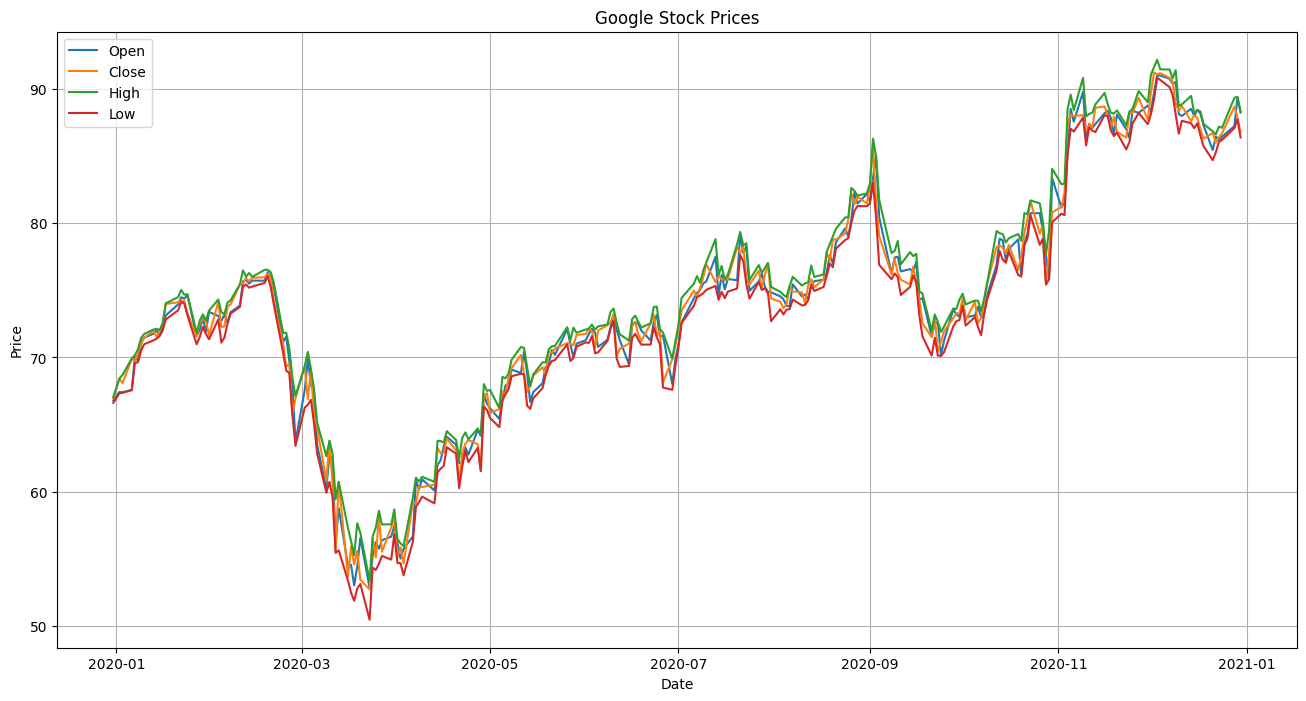

In [3]:
plt.figure(figsize=(16,8))

plt.plot(google['Open'], label='Open')
plt.plot(google['Close'], label='Close')
plt.plot(google['High'], label='High')
plt.plot(google['Low'], label='Low')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Google Stock Prices')
plt.legend()
plt.grid()
plt.show();

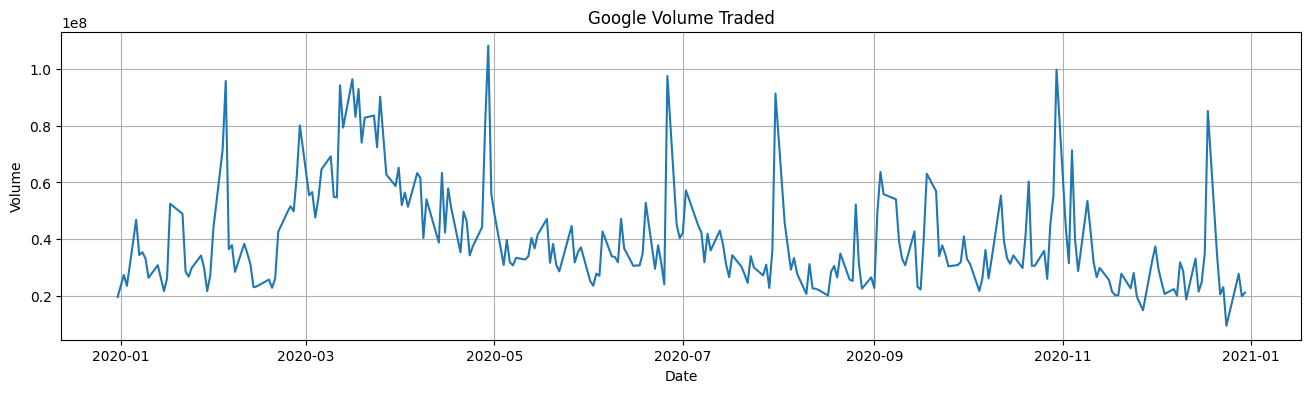

In [4]:
plt.figure(figsize=(16,4))

plt.plot(google['Volume'])

plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Google Volume Traded')
plt.grid()
plt.show();

## 2. Multiple Stocks

In [184]:
tickers = ['TSLA', 'F', 'GM']
stocks = yf.download(tickers, datetime.datetime(2012,1,1), datetime.datetime(2017,1,1), group_by='tickers')
stocks.head()

[*********************100%***********************]  3 of 3 completed


TSLA                                                    \
                Open      High       Low     Close Adj Close    Volume   
Date                                                                     
2012-01-03  1.929333  1.966667  1.843333  1.872000  1.872000  13921500   
2012-01-04  1.880667  1.911333  1.833333  1.847333  1.847333   9451500   
2012-01-05  1.850667  1.862000  1.790000  1.808000  1.808000  15082500   
2012-01-06  1.813333  1.852667  1.760667  1.794000  1.794000  14794500   
2012-01-09  1.800000  1.832667  1.741333  1.816667  1.816667  13455000   

                   GM                                                        \
                 Open       High        Low      Close  Adj Close    Volume   
Date                                                                          
2012-01-03  20.830000  21.180000  20.750000  21.049999  16.158688   9321300   
2012-01-04  21.049999  21.370001  20.750000  21.150000  16.235449   7856700   
2012-01-05  21.100000  22.290001  20.959999  22.170000  17.018431  17880600   
2012-01-06  22.260000  23.030001  22.240000  22.920000  17.594164  18234500   
2012-01-09  23.200001  23.430000  22.700001  22.840000  17.532753  12084500   

                F                                           
             Open   High    Low  Close Adj Close    Volume  
Date                                                        
2012-01-03  11.00  11.25  10.99  11.13  6.754431  45709900  
2012-01-04  11.15  11.53  11.07  11.30  6.857603  79725200  
2012-01-05  11.33  11.63  11.24  11.59  7.033591  67877500  
2012-01-06  11.74  11.80  11.52  11.71  7.106417  59840700  
2012-01-09  11.83  11.95  11.70  11.80  7.161034  53981500

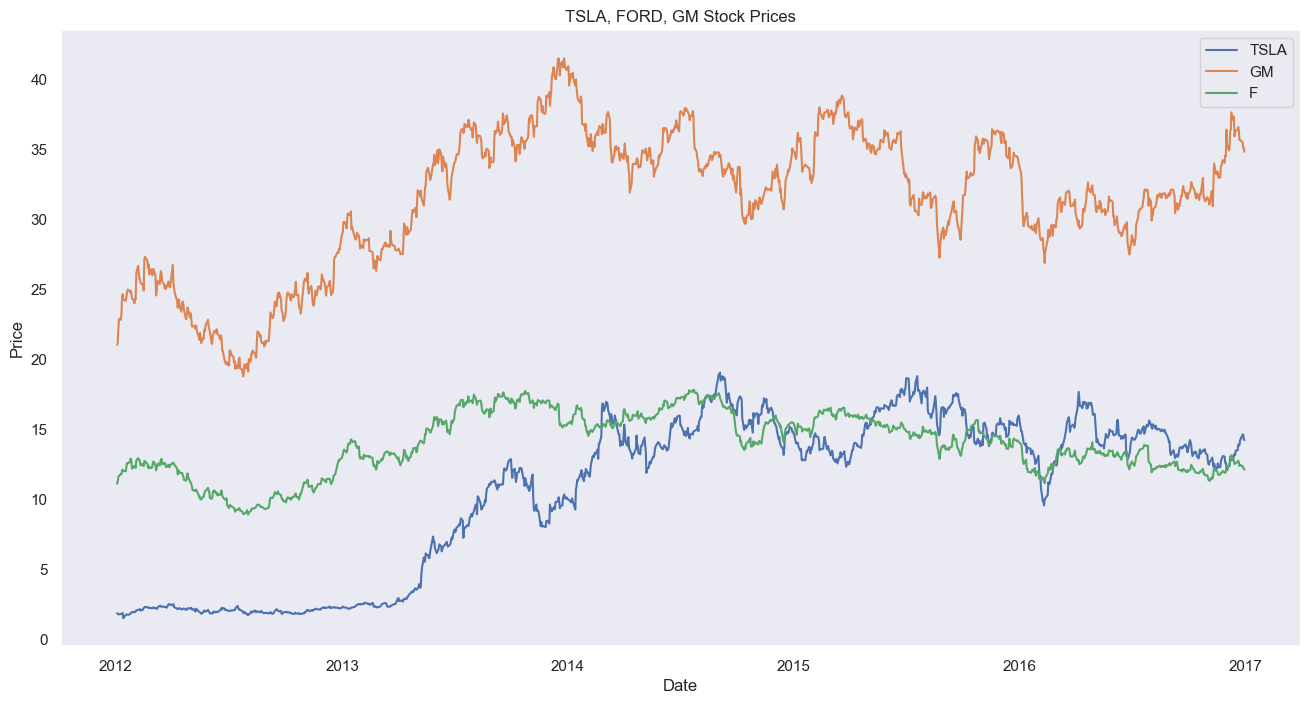

In [185]:
plt.figure(figsize=(16,8))

plt.plot(stocks.loc[:, 'TSLA']['Close'], label='TSLA')
plt.plot(stocks.loc[:, 'GM']['Close'], label='GM')
plt.plot(stocks.loc[:, 'F']['Close'], label='F')

plt.title('TSLA, FORD, GM Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show();

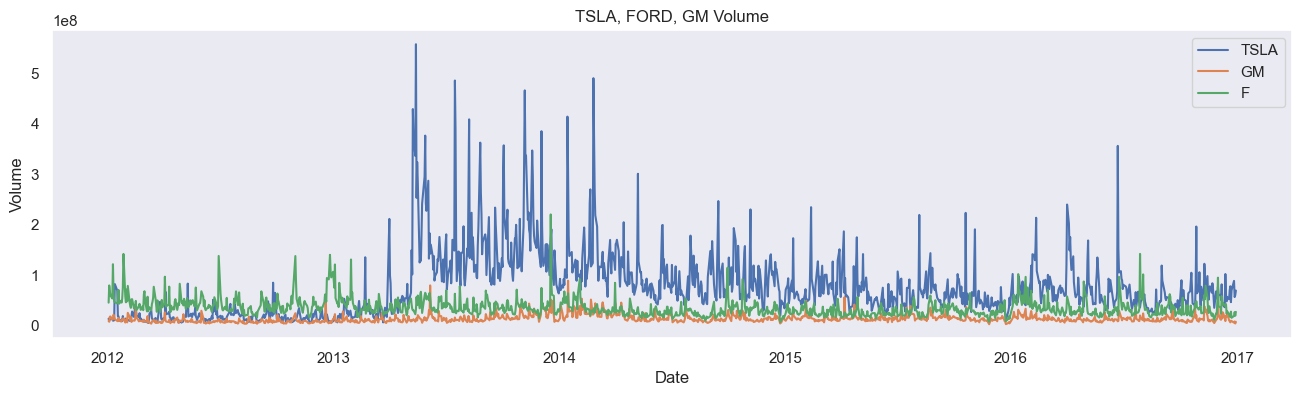

In [186]:
plt.figure(figsize=(16,4))

plt.plot(stocks.loc[:, 'TSLA']['Volume'], label='TSLA')
plt.plot(stocks.loc[:, 'GM']['Volume'], label='GM')
plt.plot(stocks.loc[:, 'F']['Volume'], label='F')

plt.title('TSLA, FORD, GM Volume')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.grid()
plt.show();

### 2.1 Market Cap

In [187]:
tsla = stocks.loc[:, 'TSLA']
gm = stocks.loc[:, 'GM']
f = stocks.loc[:, 'F']

pd.options.mode.chained_assignment = None
tsla['Total Traded'] = tsla.loc[:, 'Volume'] * tsla.loc[:, 'Close']
gm['Total Traded'] = gm.loc[:, 'Volume'] * gm.loc[:, 'Close']
f['Total Traded'] = f.loc[:, 'Volume'] * f.loc[:, 'Close']

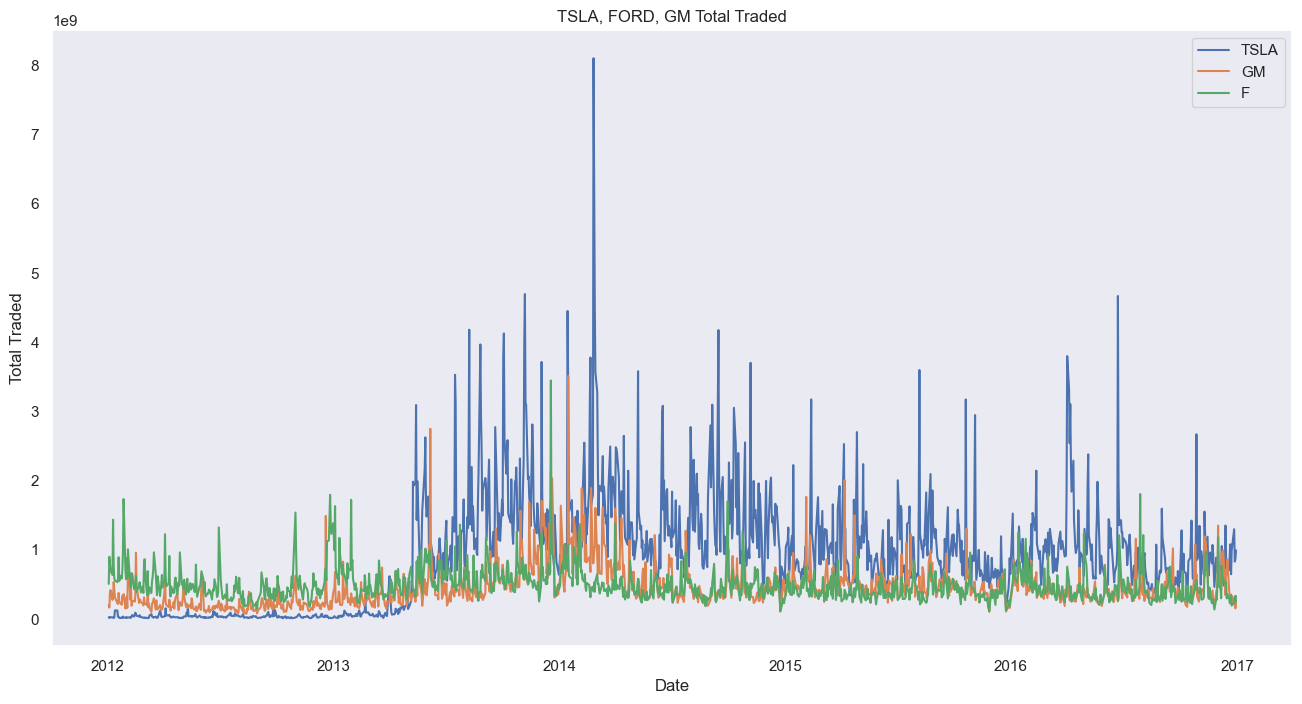

In [188]:
plt.figure(figsize=(16,8))

plt.plot(tsla['Total Traded'], label='TSLA')
plt.plot(gm['Total Traded'], label='GM')
plt.plot(f['Total Traded'], label='F')

plt.legend()
plt.title('TSLA, FORD, GM Total Traded')
plt.xlabel('Date')
plt.ylabel('Total Traded')

plt.grid()
plt.show();

### 2.2 Moving Averages

In [189]:
tsla.loc[:, 'MA50'] = tsla['Close'].rolling(50).mean()
gm.loc[:, 'MA50'] = gm['Close'].rolling(50).mean()
f.loc[:, 'MA50'] = f['Close'].rolling(50).mean()

tsla.loc[:, 'MA200'] = tsla['Close'].rolling(200).mean()
gm.loc[:, 'MA200'] = gm['Close'].rolling(200).mean()
f.loc[:, 'MA200'] = f['Close'].rolling(200).mean()

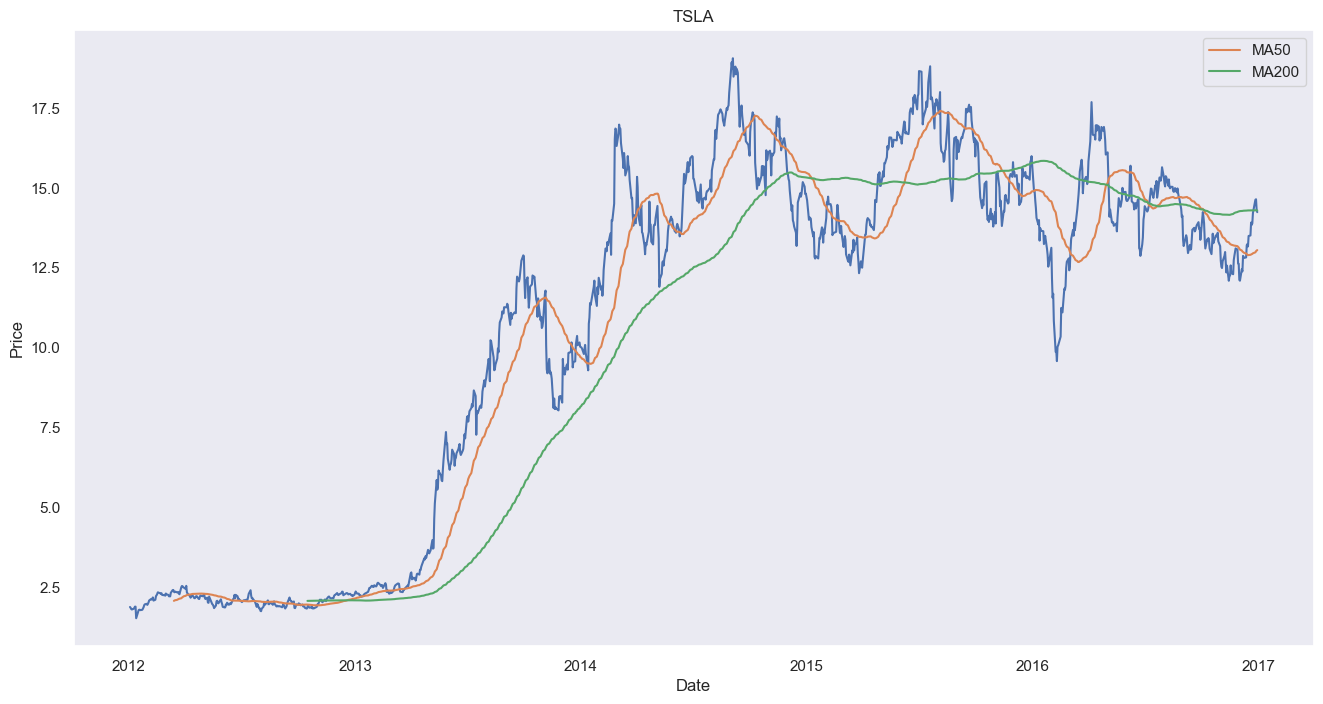

In [61]:
plt.figure(figsize=(16,8))

plt.plot(tsla['Close'])
plt.plot(tsla['MA50'], label='MA50')
plt.plot(tsla['MA200'], label='MA200')

plt.legend()
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('TSLA')
plt.grid()
plt.show();

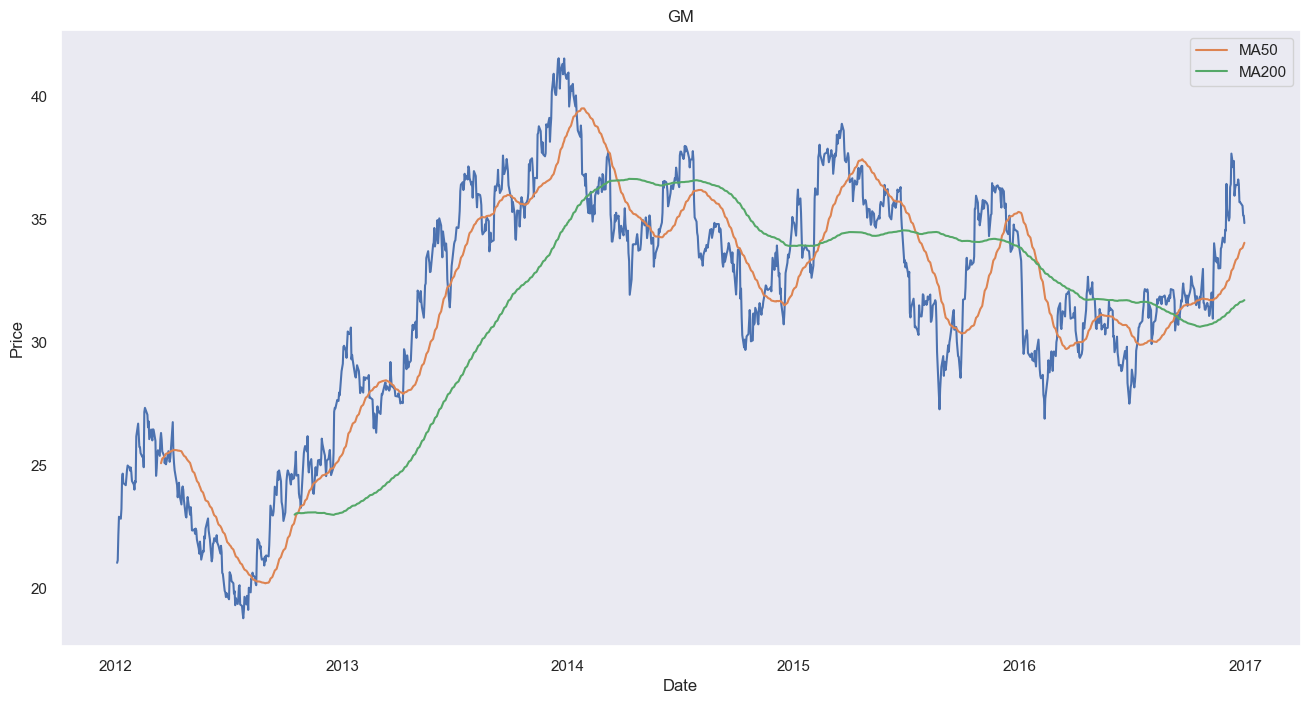

In [190]:
plt.figure(figsize=(16,8))

plt.plot(gm['Close'])
plt.plot(gm['MA50'], label='MA50')
plt.plot(gm['MA200'], label='MA200')

plt.legend()
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('GM')
plt.grid()
plt.show();

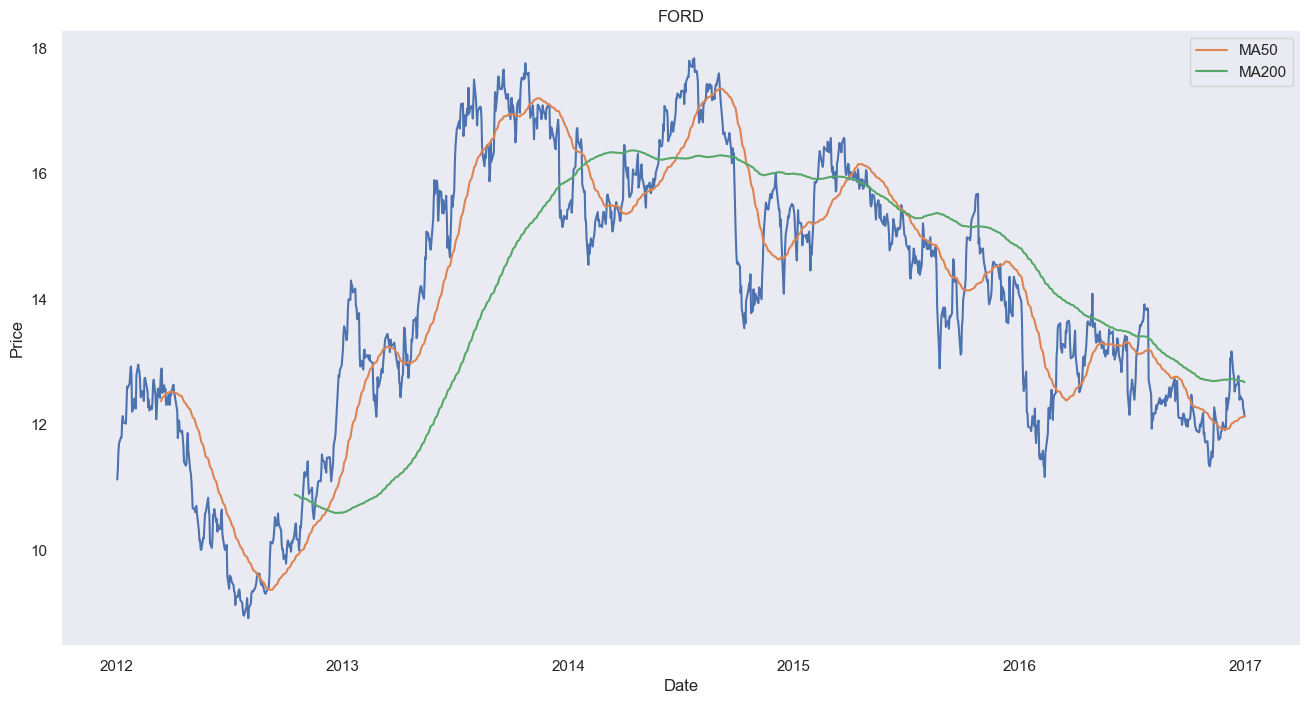

In [191]:
plt.figure(figsize=(16,8))

plt.plot(f['Close'])
plt.plot(f['MA50'], label='MA50')
plt.plot(f['MA200'], label='MA200')

plt.legend()
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('FORD')
plt.grid()
plt.show();

### 2.3 Correlation and Scatter Matrix

In [192]:
all_stocks = pd.concat([tsla['Close'], gm['Close'], f['Close']], axis=1)
all_stocks.columns = ['TSLA', 'GM', 'F']
all_stocks.head()

,TSLA,GM,F
Date,,,
2012-01-03,1.872000,21.049999,11.13
2012-01-04,1.847333,21.150000,11.30
2012-01-05,1.808000,22.170000,11.59
2012-01-06,1.794000,22.920000,11.71
2012-01-09,1.816667,22.840000,11.80


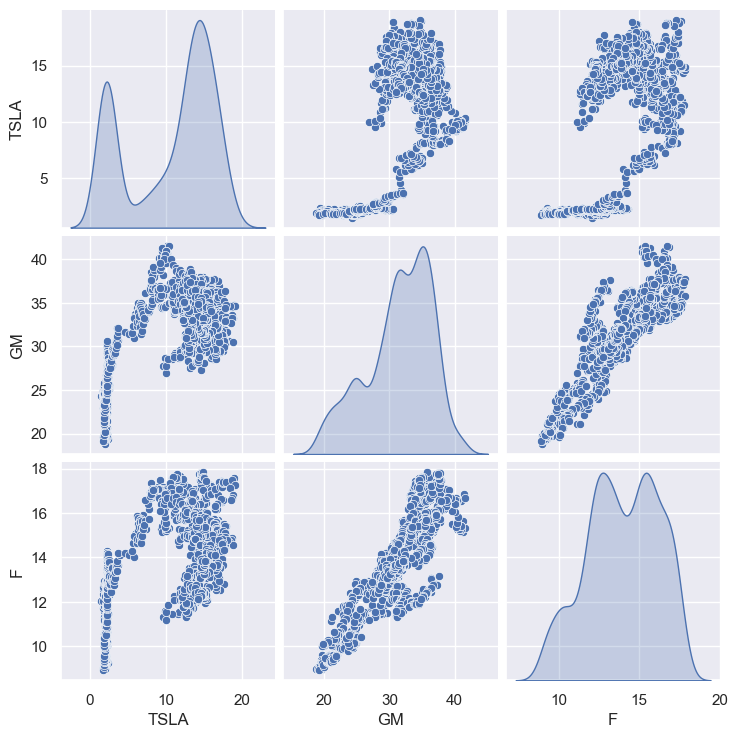

In [193]:
import seaborn as sb

sb.pairplot(all_stocks, diag_kind='kde', height=2.5);

### 2.4 Candlestick Charts

In [194]:
from mpl_finance import candlestick_ohlc
from matplotlib.dates import DateFormatter, date2num, WeekdayLocator, DayLocator, MONDAY

In [195]:
f_reset = f.loc['2012-01':'2012-04'].reset_index()
f_reset['date_ax'] = f_reset['Date'].apply(lambda date: date2num(date))
f_values = [tuple(vals) for vals in f_reset[['date_ax', 'Open', 'High', 'Low', 'Close']].values]

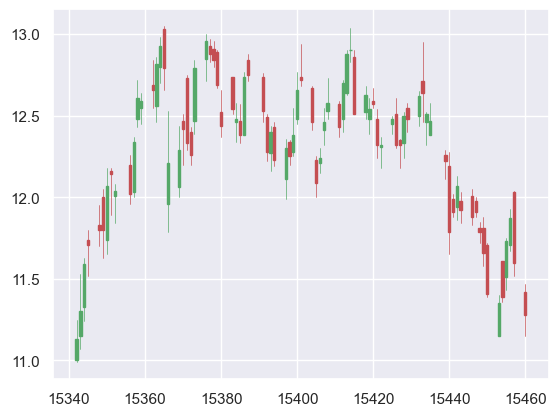

In [196]:
mondays = WeekdayLocator(MONDAY)
allDays = DayLocator()
weekFormatter = DateFormatter('%b %d')
dayFormatter = DateFormatter('%d')

fig, ax = plt.subplots()
candlestick_ohlc(ax, f_values, width=.6, colorup='g', colordown='r');

### 2.5 Daily Percent Change

In [197]:
tsla['Returns'] = (tsla['Close']/tsla['Close'].shift(1)) - 1
gm['Returns'] = (gm['Close']/gm['Close'].shift(1)) - 1
f['Returns'] = (f['Close']/f['Close'].shift(1)) - 1

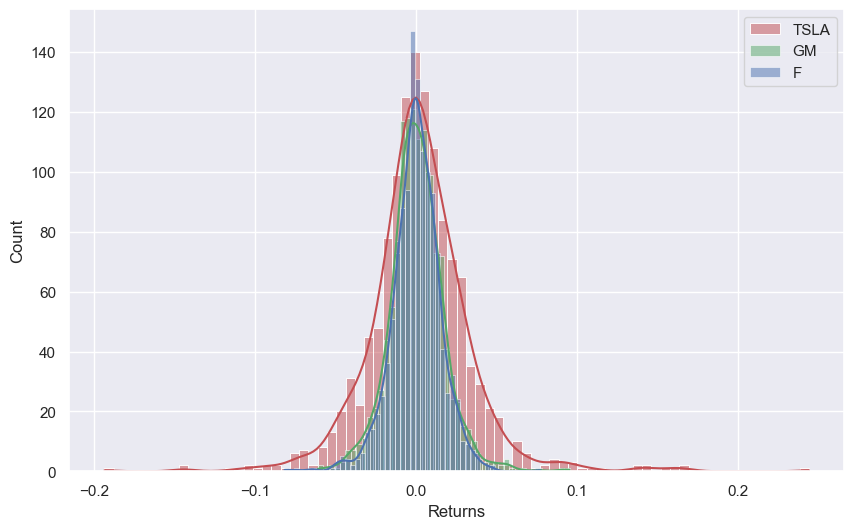

In [198]:
plt.figure(figsize=(10,6))

sb.histplot(tsla['Returns'], kde=True, color='r', label='TSLA', alpha=0.5)
sb.histplot(gm['Returns'], kde=True, color='g', label='GM', alpha=0.5)
sb.histplot(f['Returns'], kde=True, color='b', label='F', alpha=0.5)

plt.legend()
plt.show(); 

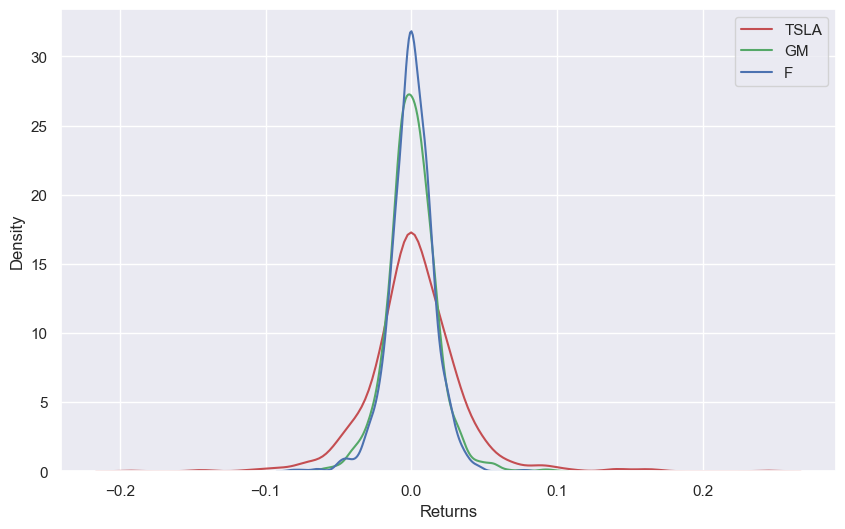

In [199]:
plt.figure(figsize=(10,6))

sb.kdeplot(tsla['Returns'], color='r', label='TSLA')
sb.kdeplot(gm['Returns'], color='g', label='GM')
sb.kdeplot(f['Returns'], color='b', label='F')

plt.legend()
plt.show(); 

### 2.5 Box Plots

<AxesSubplot:>

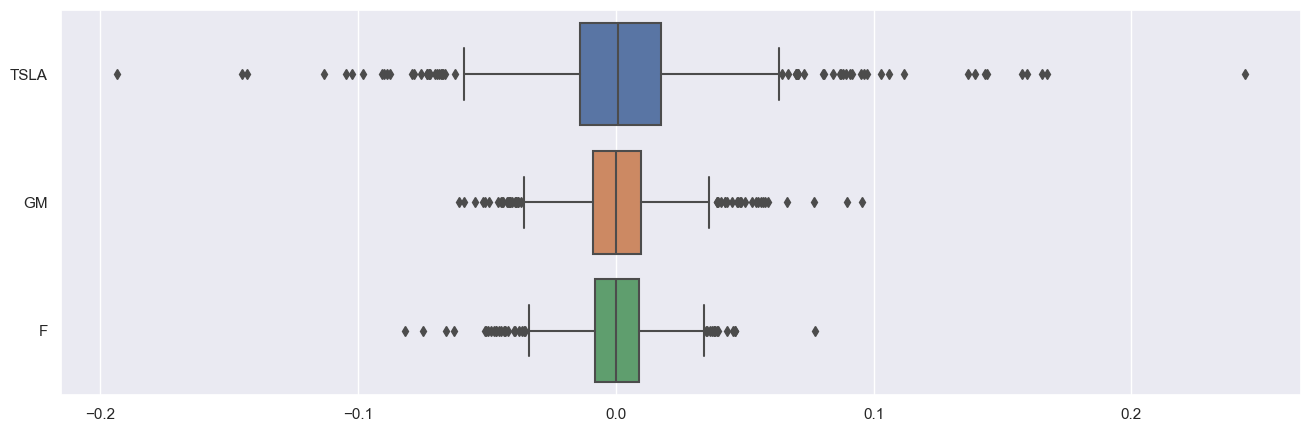

In [200]:
box_df = pd.concat([tsla['Returns'], gm['Returns'], f['Returns']], axis=1)
box_df.columns = ['TSLA', 'GM', 'F']
plt.figure(figsize=(16,5))
sb.boxplot(data=box_df, orient='h')

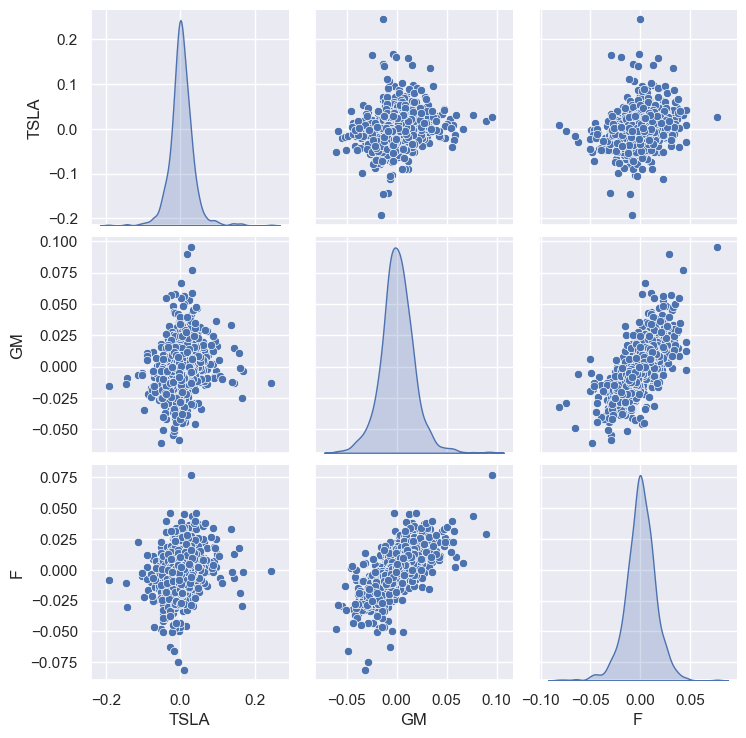

In [201]:
sb.pairplot(box_df, diag_kind='kde', height=2.5);

### 2.6 Cumulative Returns

In [208]:
tsla['Cum Returns'] = tsla['Close']/tsla['Close'][0] - 1
gm['Cum Returns'] = gm['Close']/gm['Close'][0] - 1
f['Cum Returns'] = f['Close']/f['Close'][0] - 1

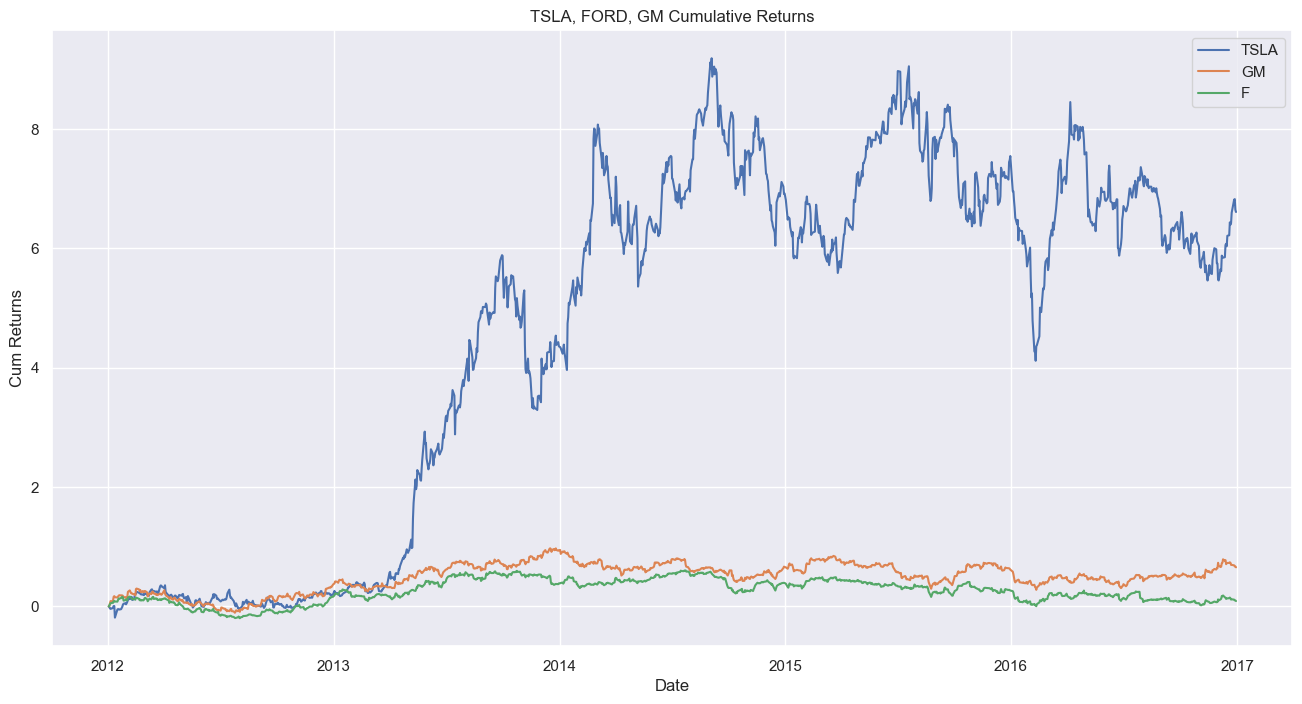

In [210]:
plt.figure(figsize=(16,8))

plt.plot(tsla['Cum Returns'], label='TSLA')
plt.plot(gm['Cum Returns'], label='GM')
plt.plot(f['Cum Returns'], label='F')

plt.title('TSLA, FORD, GM Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Cum Returns')
plt.legend()

plt.show();

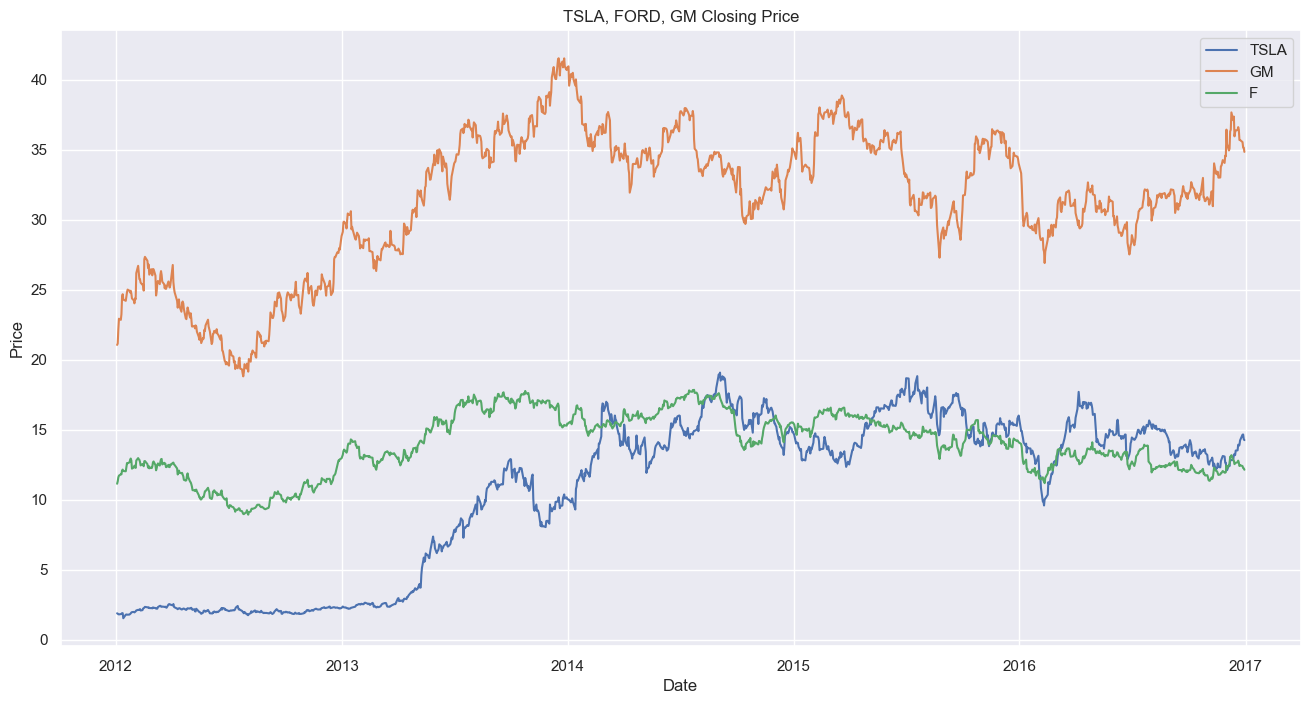

In [211]:
plt.figure(figsize=(16,8))

plt.plot(tsla['Close'], label='TSLA')
plt.plot(gm['Close'], label='GM')
plt.plot(f['Close'], label='F')

plt.title('TSLA, FORD, GM Closing Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

plt.show();